**THEORY QUESTIONS**

1. What does R-squared represent?

R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1.

2. Assumptions of Linear Regression

Linearity

Independence

Homoscedasticity

Normality of residuals

No multicollinearity

3. R-squared vs Adjusted R-squared

R-squared always increases with more features, while Adjusted R-squared penalizes unnecessary features.

4. Why use Mean Squared Error (MSE)?

MSE penalizes larger errors more heavily and is differentiable, making it suitable for optimization.

5. Adjusted R-squared = 0.85

It means 85% of the variance is explained after adjusting for the number of predictors.

6. Checking normality of residuals

Using histogram, Q-Q plot, or Shapiro-Wilk test.

7. Multicollinearity

When predictors are highly correlated, leading to unstable coefficients.

8. Mean Absolute Error (MAE)

Average of absolute differences between predicted and actual values.

9. Benefits of ML Pipeline

Cleaner workflow

Prevents data leakage

Easy experimentation

10. Why RMSE > MSE?

RMSE is in the same unit as the target variable, making interpretation easier.

11. Pickling in Python

Serializing objects to store ML models for later use.

12. High R-squared

Model explains most of the variance but doesn’t guarantee correctness.

13. Violated assumptions

Leads to biased or inefficient estimates.

14. Address multicollinearity

Remove features

Use Ridge Regression

PCA

15. Feature selection

Reduces overfitting and improves generalization.

16. Adjusted R² formula

1 − [(1−R²)(n−1)/(n−p−1)]

17. MSE sensitive to outliers

Squaring magnifies large errors.

18. Homoscedasticity

Constant variance of residuals across predictions.

19. RMSE

Square root of MSE.

20. Pickling risks

Security vulnerabilities and compatibility issues.

21. Alternatives to pickling

joblib, ONNX, PMML

22. Heteroscedasticity

Unequal variance → unreliable inference.

23. Interaction terms

Capture combined effects of features.

PRACTICAL **QUESTIONS**

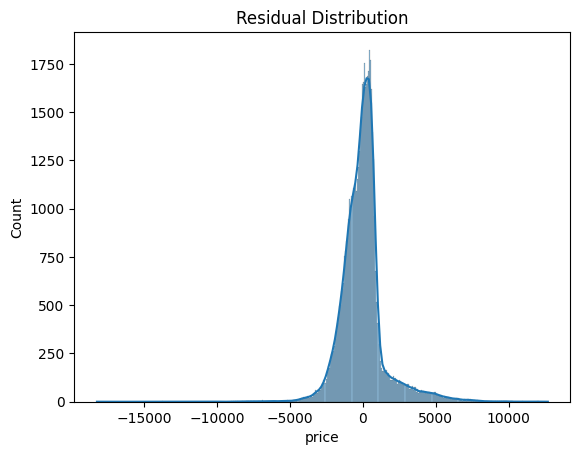

In [1]:
#1
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = sns.load_dataset("diamonds").dropna()
X = df[['carat', 'depth']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

residuals = y - model.predict(X)

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


In [2]:
#2
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print(mse, mae, rmse)



2376550.02777934 1005.1337893657361 1541.606314134494


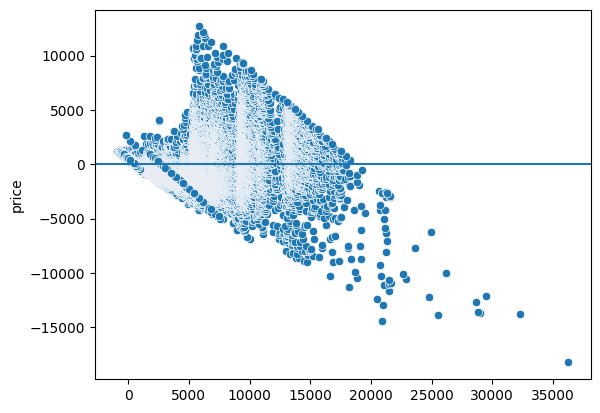

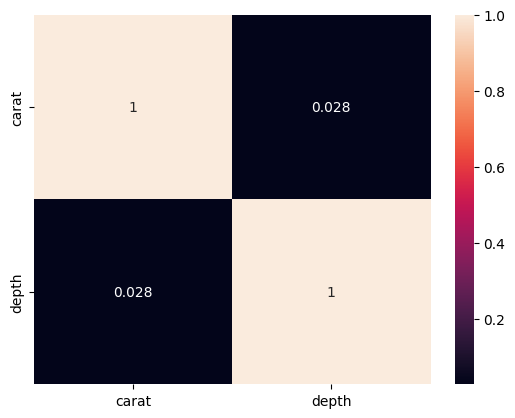

In [3]:
#3
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0)
plt.show()

sns.heatmap(X.corr(), annot=True)
plt.show()


In [4]:
#4
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe.fit(X, y)
print(pipe.score(X, y))


0.8506754571636563


In [5]:
#5
X1 = df[['carat']]
model = LinearRegression()
model.fit(X1, y)

print(model.coef_, model.intercept_, model.score(X1, y))


[7756.42561797] -2256.360580045403 0.8493305264354858


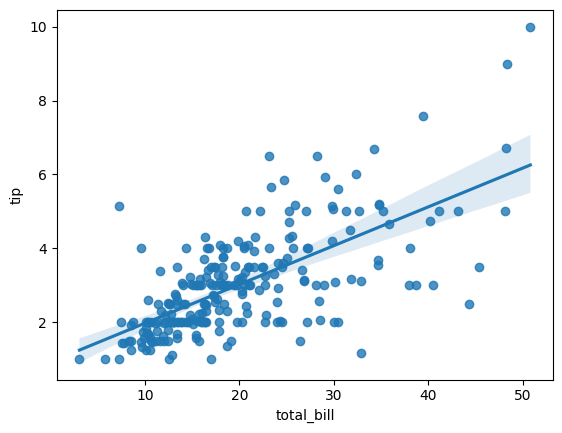

In [6]:
#6
tips = sns.load_dataset("tips")
X = tips[['total_bill']]
y = tips['tip']

model.fit(X, y)
sns.regplot(x='total_bill', y='tip', data=tips)
plt.show()


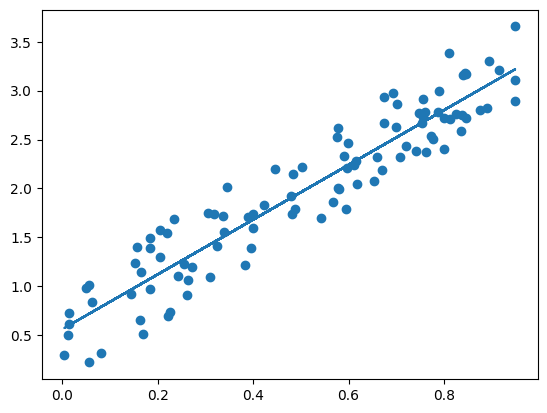

In [7]:
#7
import numpy as np

X = np.random.rand(100, 1)
y = 3*X + np.random.rand(100, 1)

model.fit(X, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.show()


In [12]:
#8
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [9]:
#9
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

model.fit(X_poly, y)


LinearRegression()

In [13]:
#10
X = np.random.rand(50,1)
y = 5*X + 2

model.fit(X, y)
print(model.coef_, model.intercept_)


[[5.]] [2.]


In [14]:
#11
for d in [1,2,3]:
    poly = PolynomialFeatures(d)
    Xp = poly.fit_transform(X)
    model.fit(Xp, y)
    print(d, model.score(Xp, y))


1 1.0
2 1.0
3 1.0


In [15]:
#12
X = np.random.rand(100,2)
y = X[:,0]*3 + X[:,1]*5

model.fit(X, y)
print(model.coef_, model.score(X, y))


[3. 5.] 1.0


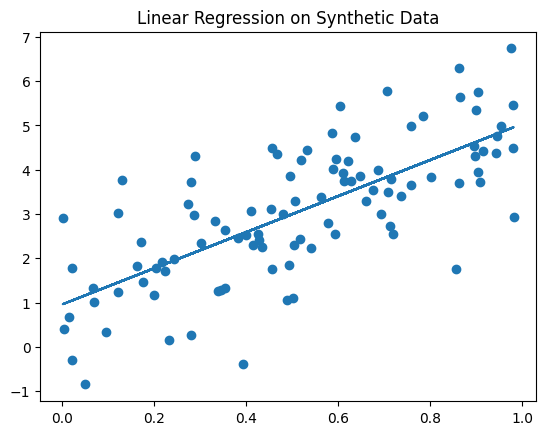

In [16]:
#13
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.random.rand(100, 1)
y = 4 * X + 1 + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.title("Linear Regression on Synthetic Data")
plt.show()


In [17]:
#14
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = pd.DataFrame({
    'X1': np.random.rand(100),
    'X2': np.random.rand(100),
    'X3': np.random.rand(100)
})

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Feature       VIF
0      X1  2.592969
1      X2  2.916618
2      X3  2.785486


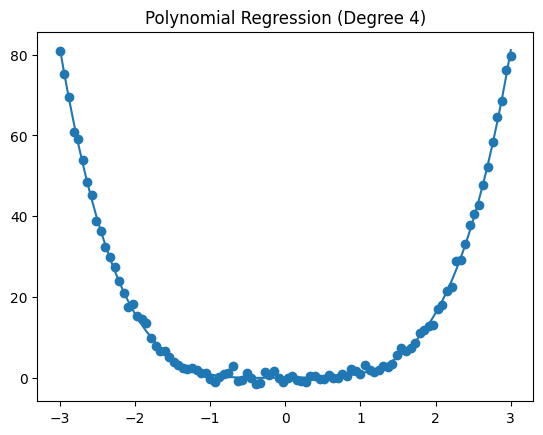

In [18]:
#15
from sklearn.preprocessing import PolynomialFeatures

X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**4 + np.random.randn(100, 1)

poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)

model.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X_poly))
plt.title("Polynomial Regression (Degree 4)")
plt.show()


In [19]:
#16
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = np.random.rand(100, 3)
y = X[:,0]*3 + X[:,1]*2 + X[:,2]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe.fit(X, y)
print("R-squared:", pipe.score(X, y))


R-squared: 1.0


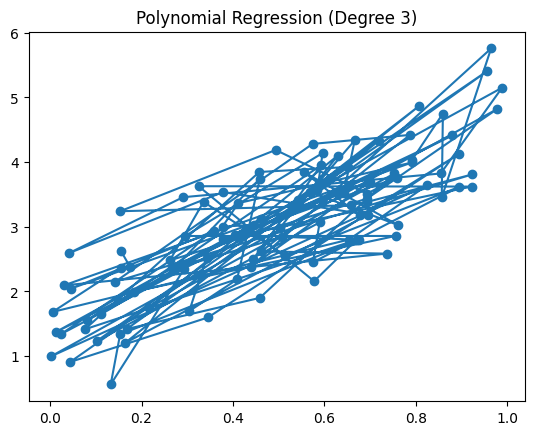

In [20]:
#17poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

model.fit(X_poly, y)

plt.scatter(X[:,0], y)
plt.plot(X[:,0], model.predict(X_poly))
plt.title("Polynomial Regression (Degree 3)")
plt.show()


In [21]:
#18
X = np.random.rand(200, 5)
y = X @ np.array([2, 4, 1, 3, 5]) + np.random.randn(200)

model.fit(X, y)

print("R-squared:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared: 0.8331250428655974
Coefficients: [2.09431844 4.31777558 0.99860263 3.26912186 5.14679718]


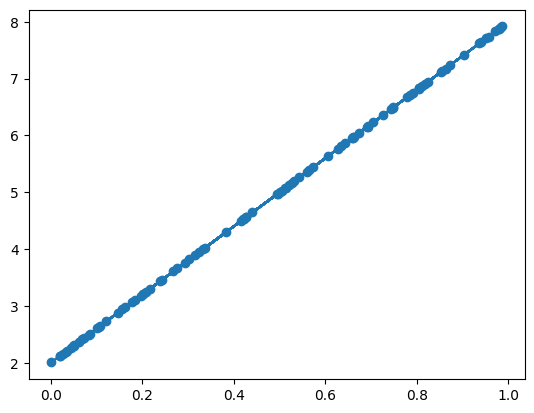

In [22]:
#19
X = np.random.rand(100, 1)
y = 6*X + 2

model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.show()


In [23]:
#20
X = np.random.rand(150, 3)
y = 2*X[:,0] + 3*X[:,1] + 4*X[:,2]

model.fit(X, y)

print("R-squared:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared: 1.0
Coefficients: [2. 3. 4.]


In [24]:
#21
import joblib

joblib.dump(model, "linear_model.joblib")
loaded_model = joblib.load("linear_model.joblib")

print("Model loaded successfully")


Model loaded successfully


In [25]:
#22
import seaborn as sns

tips = sns.load_dataset("tips")
tips_encoded = pd.get_dummies(tips, drop_first=True)

X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

model.fit(X, y)
print("R-squared:", model.score(X, y))


R-squared: 0.47007812322060794


In [26]:
#23
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

model.fit(X, y)
ridge.fit(X, y)

print("Linear R²:", model.score(X, y))
print("Ridge R²:", ridge.score(X, y))


Linear R²: 0.47007812322060794
Ridge R²: 0.4700566055867048


In [27]:
#24
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=5)
print("Average CV Score:", scores.mean())


Average CV Score: 0.4214266405944052


In [29]:
#25
for degree in range(1, 6):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)
    print(f"Degree {degree} R²:", model.score(X_poly, y))


Degree 1 R²: 0.47007812322060794
Degree 2 R²: 0.5698957845789635
Degree 3 R²: 0.6978304120589722
Degree 4 R²: 0.8172321957040416
Degree 5 R²: 0.8629094845657395
